In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
heart_dataset = pd.read_csv('/content/drive/MyDrive/WoT-project/heart.csv')

In [ ]:
heart_dataset.shape

(918, 12)

In [ ]:
heart_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart_dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
heart_dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
heart_dataset.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [ ]:
categorical_cols= heart_dataset.select_dtypes(include=['object'])
categorical_cols.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
for cols in categorical_cols.columns:
    print(cols,'-', len(categorical_cols[cols].unique()),'Labels')

Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels


In [ ]:
train, test = train_test_split(heart_dataset,test_size=0.3,random_state= 1234)

In [ ]:
labels = [x for x in train.ChestPainType.value_counts().index]
values = train.ChestPainType.value_counts()

In [ ]:
train['Sex'] = np.where(train['Sex'] == "M", 0, 1)
train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
test['Sex'] = np.where(test['Sex'] == "M", 0, 1)
test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)

In [ ]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
578,57,0,ASY,156,173,0,LVH,119,1,3.0,Down,1
480,58,0,ATA,126,0,1,Normal,110,1,2.0,Flat,1
512,35,0,NAP,123,161,0,ST,153,0,-0.1,Up,0
634,40,0,TA,140,199,0,Normal,178,1,1.4,Up,0
412,56,0,ASY,125,0,1,Normal,103,1,1.0,Flat,1


In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
578,57,0,156,173,0,119,1,3.0,1,1,0,0,0,1,0,0,1,0,0
480,58,0,126,0,1,110,1,2.0,1,0,1,0,0,0,1,0,0,1,0
512,35,0,123,161,0,153,0,-0.1,0,0,0,1,0,0,0,1,0,0,1
634,40,0,140,199,0,178,1,1.4,0,0,0,0,1,0,1,0,0,0,1
412,56,0,125,0,1,103,1,1.0,1,1,0,0,0,0,1,0,0,1,0


In [ ]:
test.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
581,48,0,140,208,0,159,1,1.5,1,1,0,0,0,0,1,0,0,0,1
623,60,0,140,293,0,170,0,1.2,1,1,0,0,0,1,0,0,0,1,0
60,49,0,100,253,0,174,0,0.0,0,0,1,0,0,0,1,0,0,0,1
613,58,0,140,385,1,135,0,0.3,0,1,0,0,0,1,0,0,0,0,1
40,54,1,150,230,0,130,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
train.shape

(642, 19)

In [ ]:
test.shape

(276, 19)

In [ ]:
x_train=train.drop(['HeartDisease'],1)
x_test=test.drop(['HeartDisease'],1)

y_train=train['HeartDisease']
y_test=test['HeartDisease']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
print(x_train.shape)
print(x_test.shape)

(642, 18)
(276, 18)


In [ ]:
def add_interaction(X):
    features = X.columns
    n = len(features)
    X_int = X.copy(deep=True)
    
    for i in range(n):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, n):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
            
    return X_int

x_train_mod = add_interaction(x_train)
x_test_mod = add_interaction(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


In [ ]:
x_train_mod.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_Normal_x_RestingECG_ST,RestingECG_Normal_x_ST_Slope_Down,RestingECG_Normal_x_ST_Slope_Flat,RestingECG_Normal_x_ST_Slope_Up,RestingECG_ST_x_ST_Slope_Down,RestingECG_ST_x_ST_Slope_Flat,RestingECG_ST_x_ST_Slope_Up,ST_Slope_Down_x_ST_Slope_Flat,ST_Slope_Down_x_ST_Slope_Up,ST_Slope_Flat_x_ST_Slope_Up
578,57,0,156,173,0,119,1,3.0,1,0,...,0,0,0,0,0,0,0,0,0,0
480,58,0,126,0,1,110,1,2.0,0,1,...,0,0,1,0,0,0,0,0,0,0
512,35,0,123,161,0,153,0,-0.1,0,0,...,0,0,0,0,0,0,1,0,0,0
634,40,0,140,199,0,178,1,1.4,0,0,...,0,0,0,1,0,0,0,0,0,0
412,56,0,125,0,1,103,1,1.0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    
    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    plt.savefig('conf1.png')

In [ ]:
#!pip install scikit-learn==0.20.4

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
#lr_clf.fit(x_train.values, y_train.values)
lr_clf.fit(x_train, y_train)

#lr_clf_pred = lr_clf.predict(x_test.values)
lr_clf_pred = lr_clf.predict(x_test)

Accuracy Score:  0.894927536231884
Precision Score:  0.8888888888888888
Recall Score:  0.9290322580645162
Confusion Matrix:  [[103  18]
 [ 11 144]]


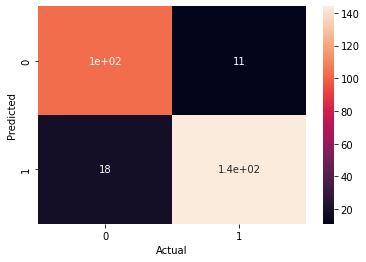

In [ ]:
y_pred_lrg = lr_clf.predict(x_test)
lgr_accuracy = round(accuracy_score(y_pred_lrg, y_test) * 100, 2)
evaluate_model(y_test, y_pred_lrg)

In [ ]:
data = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
data2 = np.array([[23,	1,	140,	293,	0,	170,	0,	1.2,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0]])
ytest = pd.DataFrame(np.reshape(data, (1, 18)))
ytest.columns = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY',	'ChestPainType_ATA',
                     'ChestPainType_NAP',	'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']

result = lr_clf.predict(ytest)

In [ ]:
print(result)

[0]


In [ ]:
import joblib
import pickle

joblib.dump(lr_clf, 'LogisticRegression_model.pkl')
pickle.dump(lr_clf, open('model.pkl', 'wb'), protocol = 2)

In [ ]:
#Load the model
lr = joblib.load('LogisticRegression_model.pkl')
# Save features from training
rnd_columns = list(x_train.columns)
joblib.dump(rnd_columns, 'lgr_columns.pkl', protocol=2)
print("Random Forest Model Colums Saved")

Random Forest Model Colums Saved


Accuracy Score:  0.8913043478260869
Precision Score:  0.8881987577639752
Recall Score:  0.9225806451612903
Confusion Matrix:  [[103  18]
 [ 12 143]]


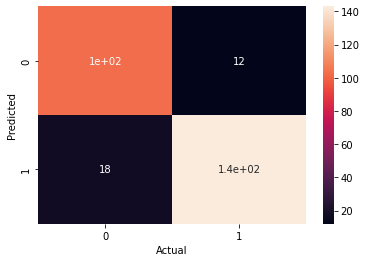

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pipe.fit(x_train, y_train)

y_pred1 = lr_clf_pipe.predict(x_test)
evaluate_model(y_test, y_pred1)

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.555 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.547 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.547 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.550 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

Accuracy Score:  0.8731884057971014
Precision Score:  0.8846153846153846
Recall Score:  0.8903225806451613
Confusion Matrix:  [[103  18]
 [ 17 138]]


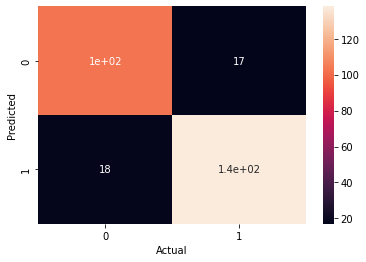

In [ ]:
svc = SVC(C=1000, gamma=0.0001)
svc.fit(x_train, y_train)
y_pred2 = svc.predict(x_test)
svc_accuracy = round(accuracy_score(y_pred2, y_test) * 100, 2)
evaluate_model(y_test, y_pred2)

In [ ]:
import joblib
import pickle

joblib.dump(svc, 'SVC_model.pkl')
pickle.dump(svc, open('svc_model.pkl', 'wb'), protocol = 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs =20, clf = DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    
    print("Training Score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Score: {:.3f}".format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy','gini'],
                     'splitter':['random','best'],
                     'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
                     'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                     'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                     'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                     'max_leaf_nodes':[10,15,20,25,30,45,50,None],
                     'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                     'max_depth':[None, 2, 4, 6, 8],
                     'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training Score: 0.835
Test Score: 0.873


DecisionTreeClassifier(max_depth=4, max_features=0.7, max_leaf_nodes=20,
                       min_samples_leaf=0.02, min_weight_fraction_leaf=0.0025,
                       random_state=2)

Accuracy Score:  0.8623188405797102
Precision Score:  0.8823529411764706
Recall Score:  0.8709677419354839
Confusion Matrix:  [[103  18]
 [ 20 135]]


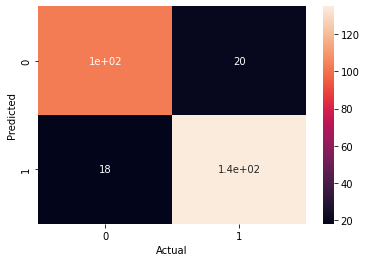

In [ ]:
ds_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=0.95,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=6, random_state=2)

ds_clf.fit(x_train, y_train)
pred4 = ds_clf.predict(x_test)
dtc_accuracy = round(accuracy_score(pred4, y_test) * 100, 2)
evaluate_model(y_test, pred4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params = {'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
                     'min_impurity_decrease':[0.0, 0.001, 0.05, 0.10, 0.15, 0.2],
                     'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40],
                     'max_depth':[None, 2, 4, 6, 8, 10, 20],
                           }, clf = RandomForestClassifier(random_state=2))

Training Score: 0.855
Test Score: 0.891


RandomForestClassifier(max_depth=10, max_features=0.4, min_samples_leaf=8,
                       random_state=2)

Accuracy Score:  0.8804347826086957
Precision Score:  0.8719512195121951
Recall Score:  0.9225806451612903
Confusion Matrix:  [[100  21]
 [ 12 143]]


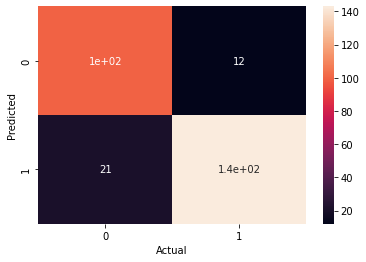

In [ ]:
rf_clf = RandomForestClassifier(max_features=0.55, min_samples_leaf=2, random_state=2)
rf_clf.fit(x_train, y_train)
pred5 = rf_clf.predict(x_test)
rdf_accuracy = round(accuracy_score(pred5, y_test) * 100, 2)
evaluate_model(y_test, pred5)

In [ ]:
import joblib
joblib.dump(rf_clf, 'heart_predictor_model.pkl')


['heart_predictor_model.pkl']

Accuracy Score:  0.8804347826086957
Precision Score:  0.8719512195121951
Recall Score:  0.9225806451612903
Confusion Matrix:  [[100  21]
 [ 12 143]]


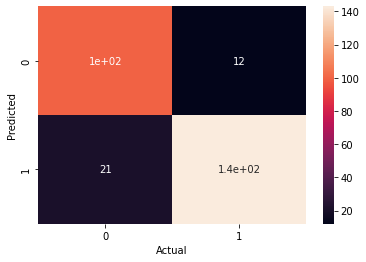

In [ ]:
model1 = joblib.load('heart_predictor_model.pkl')

pred5 = model1.predict(x_test)
evaluate_model(y_test, pred5)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 500,
                    subsample = 1.0)

eval_set = [(x_test, y_test)]

xgb1.fit(x_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.635009
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.588275
[2]	validation_0-logloss:0.548301
[3]	validation_0-logloss:0.515512
[4]	validation_0-logloss:0.486282
[5]	validation_0-logloss:0.461553
[6]	validation_0-logloss:0.438486
[7]	validation_0-logloss:0.420105
[8]	validation_0-logloss:0.404322
[9]	validation_0-logloss:0.392467
[10]	validation_0-logloss:0.379714
[11]	validation_0-logloss:0.370884
[12]	validation_0-logloss:0.362661
[13]	validation_0-logloss:0.352517
[14]	validation_0-logloss:0.343848
[15]	validation_0-logloss:0.338143
[16]	validation_0-logloss:0.332202
[17]	validation_0-logloss:0.32556
[18]	validation_0-logloss:0.320636
[19]	validation_0-logloss:0.316786
[20]	validation_0-logloss:0.313615
[21]	validation_0-logloss:0.308714
[22]	validation_0-logloss:0.305423
[23]	validation_0-logloss:0.30196
[24]	validation_0-logloss:0.300032
[25]	validation_0-logloss:0.297304
[26]	validation_0-logloss:0.293914

XGBClassifier(colsample_bytree=1.0, max_depth=4, n_estimators=500,
              subsample=1.0)

Accuracy Score:  0.8876811594202898
Precision Score:  0.8827160493827161
Recall Score:  0.9225806451612903
Confusion Matrix:  [[102  19]
 [ 12 143]]


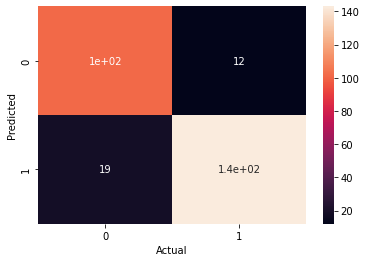

In [ ]:
pred6 = xgb1.predict(x_test)
xgb_accuracy = round(accuracy_score(pred6, y_test) * 100, 2)
evaluate_model(y_test, pred6)

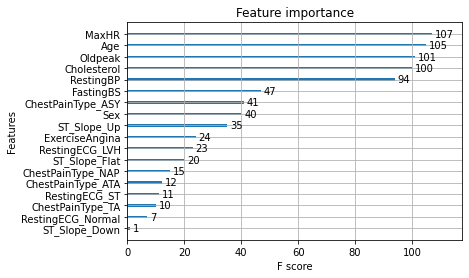

<Figure size 432x288 with 0 Axes>

In [ ]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()
plt.savefig('xgb1.png')

Accuracy Score:  0.894927536231884
Precision Score:  0.8987341772151899
Recall Score:  0.9161290322580645
Confusion Matrix:  [[105  16]
 [ 13 142]]


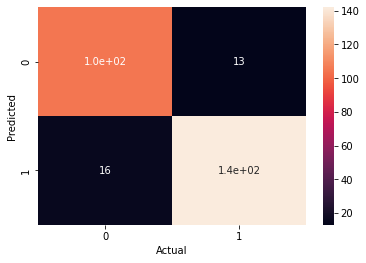

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, max_depth=1, random_state=0)
gbdt.fit(x_train, y_train)

pred_gbdt = gbdt.predict(x_test)
gbc_accuracy = round(accuracy_score(pred_gbdt, y_test) * 100, 2)
evaluate_model(y_test, pred_gbdt)

In [ ]:
import joblib
joblib.dump(gbdt, 'heart_predictor_model.pkl')
model = joblib.load('heart_predictor_model.pkl')
model.predict(x_test)

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
predictions = model.predict(x_test)
df_pred = pd.DataFrame(predictions)
df_pred.head()

,0
0,0
1,1
2,0
3,1
4,0


In [ ]:
lr = LogisticRegression(max_iter=10000)
model1=lr.fit(x_train, y_train)

In [ ]:
print("Train accuracy:",model1.score(x_train, y_train))

Train accuracy: 0.8566978193146417


In [ ]:
print("Test accuracy:",model1.score(x_test,y_test))

Test accuracy: 0.894927536231884


In [ ]:
lrpred = lr.predict(x_test)

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)

In [ ]:
result

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','SVC', 'Decision Tree', 
        'Random Forest', 'XGBClassifier','Gradient Boosting'
    ],
    'Model Accuracy Score': [
        lgr_accuracy, svc_accuracy, dtc_accuracy, rdf_accuracy,
        xgb_accuracy, gbc_accuracy
    ]
    
})

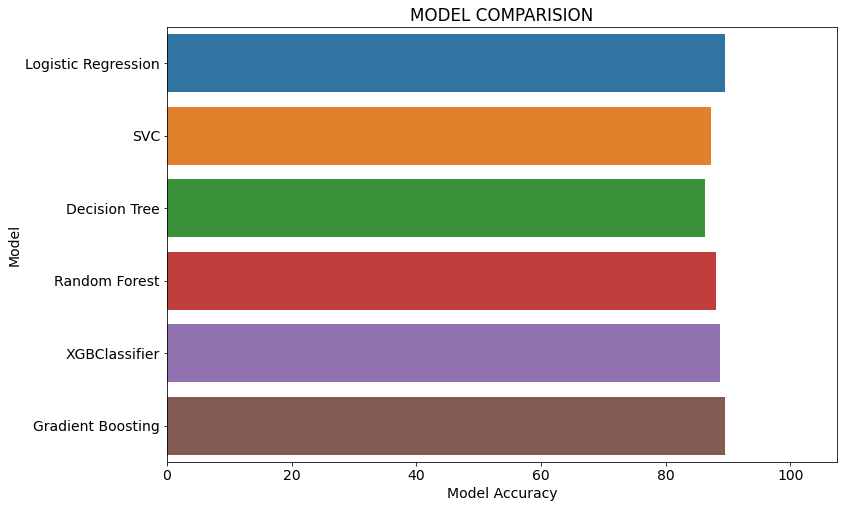

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2


import seaborn as sns

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('MODEL COMPARISION')
plt.xlabel('Model Accuracy')
plt.ylabel('Model');